In [1]:
import numpy as np
import pandas as pd
import re

In [170]:
dataset = pd.read_csv("/content/drive/MyDrive/pokemon.csv")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1543 non-null   int64  
 1   user_id             1543 non-null   int64  
 2   QoA_VLCresolution   1543 non-null   int64  
 3   QoA_VLCbitrate      1543 non-null   float64
 4   QoA_VLCframerate    1543 non-null   float64
 5   QoA_VLCdropped      1543 non-null   int64  
 6   QoA_VLCaudiorate    1543 non-null   float64
 7   QoA_VLCaudioloss    1543 non-null   int64  
 8   QoA_BUFFERINGcount  1543 non-null   int64  
 9   QoA_BUFFERINGtime   1543 non-null   int64  
 10  QoS_type            1543 non-null   int64  
 11  QoS_operator        1543 non-null   int64  
 12  QoD_model           1543 non-null   object 
 13  QoD_os-version      1543 non-null   object 
 14  QoD_api-level       1543 non-null   int64  
 15  QoU_sex             1543 non-null   int64  
 16  QoU_ag

In [136]:
dataset.isna().sum()

id                  0
user_id             0
QoA_VLCbitrate      0
QoA_VLCframerate    0
QoA_VLCdropped      0
                   ..
QoF_audio_5         0
QoF_video_2         0
QoF_video_3         0
QoF_video_4         0
QoF_video_5         0
Length: 72, dtype: int64

In [171]:
dataset = dataset.round(1)
dataset.head()

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.4,25.0,0,43.8,0,2,683,...,4.1.1(122573.16),16,1,20,5,3,5,3,4,3
1,428,46,360,402.6,30.1,0,44.2,0,2,690,...,4.4.2(I9195XXUCNK1),19,1,25,5,4,5,5,5,5
2,406,44,360,735.8,24.2,0,44.2,0,2,840,...,4.1.2(I9300XXELL4),16,1,22,5,3,5,4,4,4
3,1256,133,240,529.5,24.1,9,43.8,0,2,868,...,4.4.4(suv3Rw),19,1,31,5,4,5,5,5,5
4,244,22,360,736.0,24.1,0,43.8,0,2,869,...,4.1.2(I9300XXELL4),16,0,26,5,5,5,4,5,5


In [172]:
dataset = dataset.rename(columns={'QoU_Ustedy': 'QoU_study'})

dataset = dataset.rename(columns={'QoS_operator': 'Noperator'})

dataset = dataset.rename(columns={'QoS_type': 'Ntype'})

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1543 non-null   int64  
 1   user_id             1543 non-null   int64  
 2   QoA_VLCresolution   1543 non-null   int64  
 3   QoA_VLCbitrate      1543 non-null   float64
 4   QoA_VLCframerate    1543 non-null   float64
 5   QoA_VLCdropped      1543 non-null   int64  
 6   QoA_VLCaudiorate    1543 non-null   float64
 7   QoA_VLCaudioloss    1543 non-null   int64  
 8   QoA_BUFFERINGcount  1543 non-null   int64  
 9   QoA_BUFFERINGtime   1543 non-null   int64  
 10  Ntype               1543 non-null   int64  
 11  Noperator           1543 non-null   int64  
 12  QoD_model           1543 non-null   object 
 13  QoD_os-version      1543 non-null   object 
 14  QoD_api-level       1543 non-null   int64  
 15  QoU_sex             1543 non-null   int64  
 16  QoU_ag

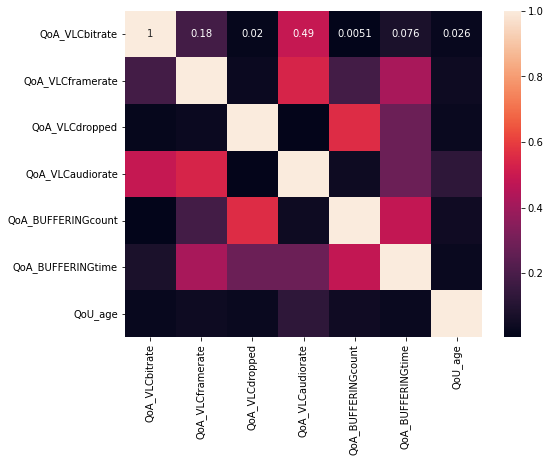

In [140]:
continuous_var = ['QoA_VLCbitrate', 'QoA_VLCframerate', 'QoA_VLCdropped','QoA_VLCaudiorate', 
                  'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime', 'QoU_age']


plt.figure(figsize=(8,6))
sns.heatmap(dataset[continuous_var].corr().abs(),annot=True);


C:\Users\sabri\.julia\conda\3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sabri\.julia\conda\3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sabri\.julia\conda\3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sabri\.julia\conda\3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

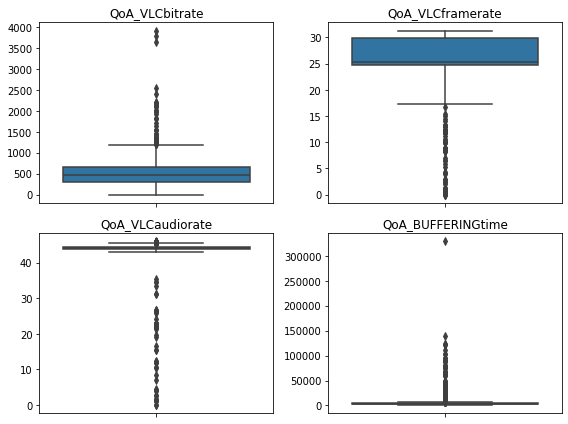

In [110]:
import seaborn as sns

continuous_var_other = ["QoA_VLCbitrate","QoA_VLCframerate","QoA_VLCaudiorate","QoA_BUFFERINGtime"]

plt.figure(figsize=(8,6))
for c,var in enumerate(continuous_var_other):
  plt.subplot(2,2,c+1)
  ax = sns.boxplot(data=dataset[continuous_var_other], y=var)
  ax.ticklabel_format(style='plain', axis='y')
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

In [102]:
dataset["QoA_BUFFERINGtime"].max()

329271

C:\Users\sabri\.julia\conda\3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sabri\.julia\conda\3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sabri\.julia\conda\3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sabri\.julia\conda\3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

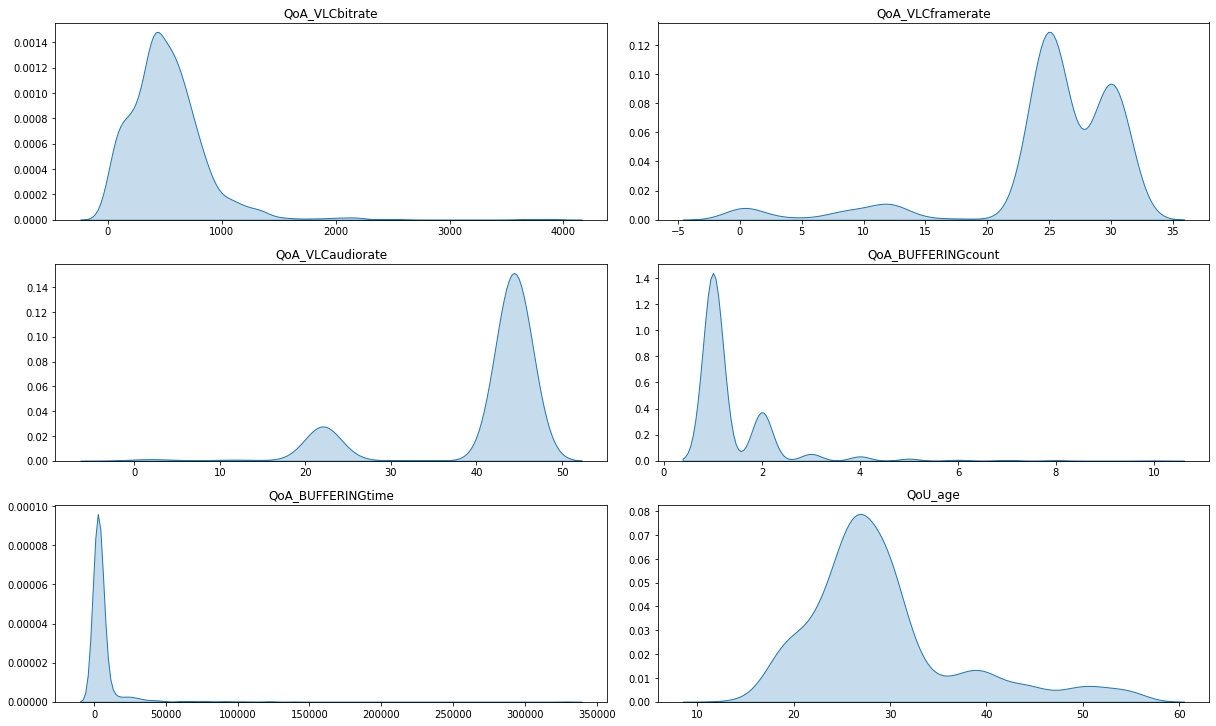

In [111]:
plt.figure(figsize=(17,20))

for c,var in enumerate(continuous_var):
  plt.subplot(6,2,c+1)
  sns.kdeplot(data=dataset[continuous_var], x=var, fill=var)
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

In [174]:
colunas_para_converter = ["QoD_os-version","Ntype", "QoD_model","QoU_sex", "Noperator", 
                          "QoF_begin", "QoF_shift", "QoF_audio", "QoF_video","QoA_VLCresolution", "QoU_study"]

dataset[colunas_para_converter] = dataset[colunas_para_converter].astype('object')

In [175]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1543 non-null   int64  
 1   user_id             1543 non-null   int64  
 2   QoA_VLCresolution   1543 non-null   object 
 3   QoA_VLCbitrate      1543 non-null   float64
 4   QoA_VLCframerate    1543 non-null   float64
 5   QoA_VLCdropped      1543 non-null   int64  
 6   QoA_VLCaudiorate    1543 non-null   float64
 7   QoA_VLCaudioloss    1543 non-null   int64  
 8   QoA_BUFFERINGcount  1543 non-null   int64  
 9   QoA_BUFFERINGtime   1543 non-null   int64  
 10  Ntype               1543 non-null   object 
 11  Noperator           1543 non-null   object 
 12  QoD_model           1543 non-null   object 
 13  QoD_os-version      1543 non-null   object 
 14  QoD_api-level       1543 non-null   int64  
 15  QoU_sex             1543 non-null   object 
 16  QoU_ag

In [176]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ["QoA_BUFFERINGtime", "QoA_VLCbitrate", "QoA_VLCframerate", 
                        "QoA_VLCdropped", "QoA_VLCaudiorate", "QoA_BUFFERINGcount", "QoD_api-level", "QoU_age"]

df_to_normalize = dataset[columns_to_normalize]

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=columns_to_normalize)

dataset[columns_to_normalize] = df_normalized

print(df_normalized.head())

   QoA_BUFFERINGtime  QoA_VLCbitrate  QoA_VLCframerate  QoA_VLCdropped  \
0           0.000000        0.134854          0.798722        0.000000   
1           0.000021        0.102749          0.961661        0.000000   
2           0.000478        0.187786          0.773163        0.000000   
3           0.000563        0.135135          0.769968        0.084112   
4           0.000566        0.187837          0.769968        0.000000   

   QoA_VLCaudiorate  QoA_BUFFERINGcount  QoD_api-level   QoU_age  
0          0.952174            0.111111       0.142857  0.146341  
1          0.960870            0.111111       0.571429  0.268293  
2          0.960870            0.111111       0.142857  0.195122  
3          0.952174            0.111111       0.571429  0.414634  
4          0.952174            0.111111       0.142857  0.292683  


In [177]:
variaveis_categoricas = dataset.select_dtypes(include=['object']).columns

dataset = pd.get_dummies(dataset, columns=variaveis_categoricas, drop_first=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1543 non-null   int64  
 1   user_id                              1543 non-null   int64  
 2   QoA_VLCbitrate                       1543 non-null   float64
 3   QoA_VLCframerate                     1543 non-null   float64
 4   QoA_VLCdropped                       1543 non-null   float64
 5   QoA_VLCaudiorate                     1543 non-null   float64
 6   QoA_VLCaudioloss                     1543 non-null   int64  
 7   QoA_BUFFERINGcount                   1543 non-null   float64
 8   QoA_BUFFERINGtime                    1543 non-null   float64
 9   QoD_api-level                        1543 non-null   float64
 10  QoU_age                              1543 non-null   float64
 11  MOS                           

**Logistic Regression**

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score


X = dataset.drop(columns=['MOS'])
y = dataset['MOS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
#print(f'Classification Report:\n{classification_report_str}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R-squared (R^2): {r2}')



Accuracy: 0.7411003236245954
Confusion Matrix:
[[ 12   3   1   2   2]
 [  2   4   9   4   0]
 [  0   3  13  26   3]
 [  1   0   3 153   5]
 [  0   0   0  16  47]]
MSE: 0.511326860841424
MAE: 0.32362459546925565
R-squared (R^2): 0.5397450884271654


C:\Users\sabri\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X = dataset.drop(columns=['MOS'])
y = dataset['MOS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando o modelo LASSO
lasso_model = Lasso(alpha=0.02)  # O parâmetro alpha controla a força da penalidade L1

# Treinando o modelo
lasso_model.fit(X_train_scaled, y_train)

# Obtendo os coeficientes do modelo (alguns podem ser zero devido à penalidade L1)
coefficients = lasso_model.coef_

# Fazendo previsões no conjunto de teste
y_pred = lasso_model.predict(X_test_scaled)

# Avaliando o desempenho do modelo (use métricas apropriadas para o seu problema)
# Exemplo usando R² para regressão
r2_score = lasso_model.score(X_test_scaled, y_test)

# Exibindo resultados
print(f'Coeficientes do modelo:\n{coefficients}')
print(f'R² no conjunto de teste: {r2_score}')


Coeficientes do modelo:
[-0.0020289  -0.         -0.         -0.          0.0387935  -0.01229964
  0.04269902  0.         -0.09371988 -0.02155693 -0.         -0.00313401
  0.          0.          0.          0.          0.19470337  0.07085384
  0.58010938  0.12640469 -0.00580397 -0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.00071285 -0.          0.          0.00755718 -0.
 -0.         -0.         -0.         -0.00306168 -0.          0.
  0.          0.00833057  0.        ]
R² no conjunto de teste: 0.8154455869951527


**Random Forest**

In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = dataset.drop(columns=['MOS'])
y = dataset['MOS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth_value = 10  

rf_model = RandomForestClassifier(n_estimators=100, max_depth=max_depth_value, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
#print(f'Classification Report:\n{classification_report_str}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R-squared (R^2): {r2}')


Accuracy: 0.8317152103559871
Confusion Matrix:
[[ 17   2   0   1   0]
 [  0  10   6   3   0]
 [  0   4  27  14   0]
 [  0   0   7 149   6]
 [  0   0   0   9  54]]
MSE: 0.22330097087378642
MAE: 0.18446601941747573
R-squared (R^2): 0.7990026019080659


**XGBoost applied to the Random Forest's results**

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Separando os dados em features (X) e target (y)
X = dataset.drop(columns=['MOS'])
y = dataset['MOS']

# Utilizando LabelEncoder para mapear os rótulos para inteiros
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividindo o conjunto de dados em treino e teste
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo Random Forest
rf_model.fit(X_train_rf, y_train_rf)

# Obtendo as previsões do Random Forest no conjunto de treino e teste
y_pred_train_rf = rf_model.predict(X_train_rf)
y_pred_test_rf = rf_model.predict(X_test_rf)

# Adicionando as previsões do Random Forest como uma nova feature no conjunto de teste
X_test_with_rf_predictions = X_test_rf.copy()
X_test_with_rf_predictions['rf_predictions'] = y_pred_test_rf

# Adicionando uma coluna vazia 'rf_predictions' ao conjunto de treino
X_train_rf['rf_predictions'] = 0  # Você pode ajustar o valor conforme necessário

# Criando o modelo XGBoost
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(set(y)), random_state=42)

# Treinando o modelo XGBoost usando as previsões do Random Forest como features
xgb_model.fit(X_train_rf, y_train_rf)

# Obtendo as previsões do XGBoost no conjunto de treino e teste
y_pred_train_xgb = xgb_model.predict(X_train_rf)
y_pred_test_xgb = xgb_model.predict(X_test_with_rf_predictions)

# Avaliando o desempenho do modelo XGBoost no conjunto de treino e teste
accuracy_train_xgb = accuracy_score(y_train_rf, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test_rf, y_pred_test_xgb)


# Exibindo resultados do conjunto de treino e teste para o XGBoost
print("\nResultados do XGBoost:")
print(f'Acurácia no conjunto de treino: {accuracy_train_xgb}')
print(f'Acurácia no conjunto de teste: {accuracy_test_xgb}')

# Avaliando o desempenho do modelo XGBoost
accuracy = accuracy_score(y_test_rf, y_pred_xgb)
conf_matrix = confusion_matrix(y_test_rf, y_pred_xgb)

mse = mean_squared_error(y_test_rf, y_pred_xgb)
mae = mean_absolute_error(y_test_rf, y_pred_xgb)
r2 = r2_score(y_test_rf, y_pred_xgb)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R-squared (R^2): {r2}')





Resultados do XGBoost:
Acurácia no conjunto de treino: 1.0
Acurácia no conjunto de teste: 0.7993527508090615
Accuracy: 1.0
Confusion Matrix:
[[ 20   0   0   0   0]
 [  0  19   0   0   0]
 [  0   0  45   0   0]
 [  0   0   0 162   0]
 [  0   0   0   0  63]]
MSE: 0.0
MAE: 0.0
R-squared (R^2): 1.0


**Leaning curve**

C:\Users\sabri\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sabri\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

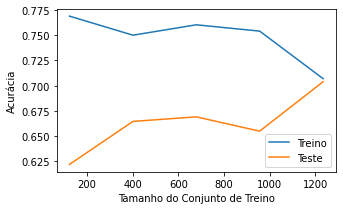

In [182]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')

plt.figure(figsize=(5, 3))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Treino')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Teste')
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


**Leaning curve for XGBoost applied to the Random Forest:**

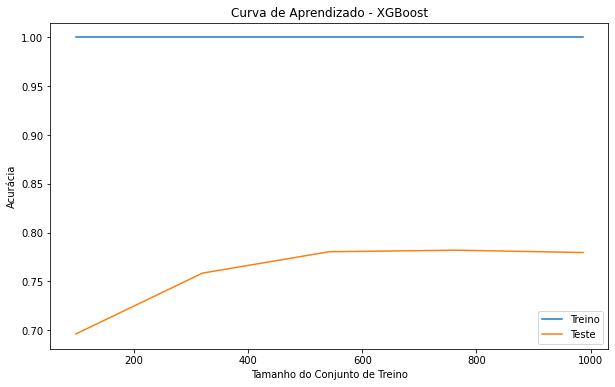

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separando os dados em features (X) e target (y)
X = dataset.drop(columns=['MOS'])
y = dataset['MOS']

# Utilizando LabelEncoder para mapear os rótulos para inteiros
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(set(y)), random_state=42)

# Obtendo as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Plotando a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Treino')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Teste')
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Curva de Aprendizado - XGBoost')
plt.show()


In this second one there is a significant gap between the training and test accuracies, which is a sign of overfitting.

**Hyperparameter tuning:**

In [25]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separating the data into features (X) and target (y)
X = dataset.drop(columns=['MOS'])
y = dataset['MOS']

# Using LabelEncoder to map labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the XGBoost model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(set(y)), random_state=42)

# Defining the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Performing the grid search on the training data
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Making predictions on the test set with the best model
y_pred_best = best_xgb_model.predict(X_test)

# Displaying the classification report for the best model
classification_report_str_best = classification_report(y_test, label_encoder.inverse_transform(y_pred_best))
print("Classification Report for the Best Model:")
print(classification_report_str_best)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        19
           2       0.30      0.16      0.21        45
           3       0.30      0.08      0.13       162
           4       0.06      0.14      0.08        63
           5       0.00      0.00      0.00         0

    accuracy                           0.09       309
   macro avg       0.11      0.06      0.07       309
weighted avg       0.21      0.09      0.11       309



C:\Users\sabri\.julia\conda\3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sabri\.julia\conda\3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sabri\.julia\conda\3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sabri\.julia\conda\3\lib\site-packages\

The hyperparameter tuning did not lead to an improvement in the model's ability to generalize to new data.